# <span style="color:#0b486b">  FIT3181: Deep Learning (2021)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Haw**  <br/>
Firstname: **Xiao Ying**    <br/>
Student ID: **29797918**    <br/>
Email: **xhaw0001@student.monash.edu**    <br/>
Your tutorial time: **Tuesday 3.00p.m.-5.00p.m.**    <br/>
***

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [1]:
import tensorflow as tf
from tensorflow import keras

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [3]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full = X_train_full_img.reshape(num_train, 28*28) 
X_test = X_test_img.reshape(num_test, 28*28)
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the piels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [4]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[:i], y_train_full[:i]
X_valid, y_valid = X_train_full[i:], y_train_full[i:]
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show the first $36$ images in X_train_full_img (which is an array of images) with labels as shown in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

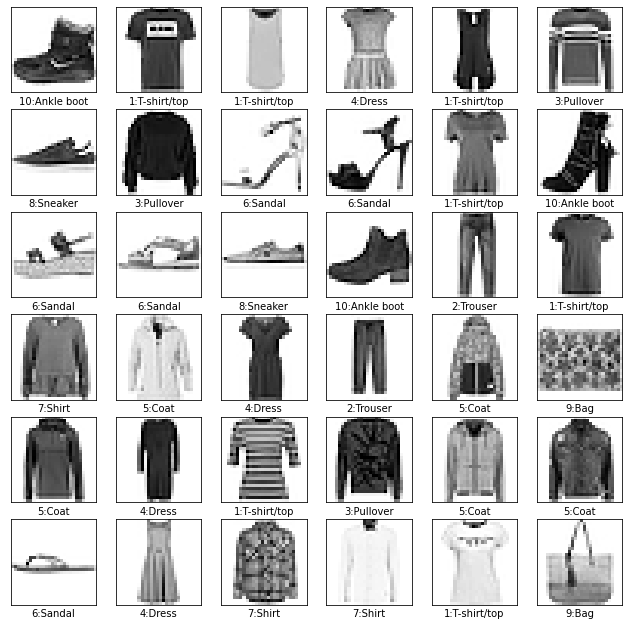

In [6]:
class_names = ["1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", 
               "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"]

plt.figure(figsize=(11, 11))

for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(X_train[i].reshape((28,28)), cmap='Greys')
    label = int(y_train[i])
    plt.xlabel(class_names[label])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

dnn_model = Sequential()
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=25, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))

dnn_model.build()
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 16,485
Trainable params: 16,485
Non-trainable params: 0
_________________________________________________________________


In [8]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = dnn_model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5966 - accuracy: 0.7905 - val_loss: 0.4513 - val_accuracy: 0.8402
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4364 - accuracy: 0.8466 - val_loss: 0.4400 - val_accuracy: 0.8418
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4063 - accuracy: 0.8573 - val_loss: 0.4231 - val_accuracy: 0.8477
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3836 - accuracy: 0.8639 - val_loss: 0.3865 - val_accuracy: 0.8620
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3698 - accuracy: 0.8658 - val_loss: 0.3883 - val_accuracy: 0.8643
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3588 - accuracy: 0.8704 - val_loss: 0.3864 - val_accuracy: 0.8587
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3487 - accuracy: 0.8748 - val_loss: 0.3860 - val_accuracy:

In [23]:
loss, acc = dnn_model.evaluate(X_test, y_test)  
print("The loss of this model is {:.4f} whereas accuracy is {:.4f}".format(loss, acc))

313/313 [==============================] - 0s 406us/step - loss: 0.4141 - accuracy: 0.8562
The loss of this model is 0.4141 whereas accuracy is 0.8562


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first hidden layer $n_1 \in \{10, 20, 30, 40\}$ and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the pattern $784 \rightarrow n_1 (act) \rightarrow 25(act) \rightarrow 10(softmax)$ where $n_1$ and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1$ and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

act = ['sigmoid', 'tanh', 'relu']
n1 = [10, 20, 30, 40]
opt = keras.optimizers.Adam(learning_rate=0.005)
best_acc = 0
best_i = []

for n in n1:
    for activation in act:
        print("Evaluating with {} as the number of neurons on the first hidden layer and {} as the activation function".format(str(n), activation))
        model = Sequential()
        model.add(Dense(units=n,  input_shape=(784,), activation='relu'))
        model.add(Dense(units=25, activation='relu'))
        model.add(Dense(units=10, activation='softmax'))
        model.build()    
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), verbose=0)
        acc = model.evaluate(X_test, y_test)[1]
        print("The test accuracy is {}\n".format(acc))
        if acc > best_acc:
            best_acc = acc
            best_i = [n, activation]
            
print("The best accuracy is {} with {} as the number of neurons on the first hidden layer and {} as the activation function".format(best_acc, best_i[0], best_i[1]))

Evaluating with 10 as the number of neurons on the first hidden layer and sigmoid as the activation function
313/313 [==============================] - 0s 572us/step - loss: 0.5317 - accuracy: 0.8170
The test accuracy is 0.8169999718666077

Evaluating with 10 as the number of neurons on the first hidden layer and tanh as the activation function
313/313 [==============================] - 0s 611us/step - loss: 0.5176 - accuracy: 0.8197
The test accuracy is 0.8197000026702881

Evaluating with 10 as the number of neurons on the first hidden layer and relu as the activation function
313/313 [==============================] - 0s 499us/step - loss: 0.6689 - accuracy: 0.7653
The test accuracy is 0.7652999758720398

Evaluating with 20 as the number of neurons on the first hidden layer and sigmoid as the activation function
313/313 [==============================] - 0s 537us/step - loss: 0.4479 - accuracy: 0.8451
The test accuracy is 0.8450999855995178

Evaluating with 20 as the number of neuron

####  <span style="color:red">**Question 2.6**</span>. Experimenting with temperature-based softmax
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Given a temperature parameter $\tau>0$, we define a temperature-based $\tau-softmax$ as follows
- Given $h=[h_m]_{m=1}^M$, $p = \tau-softmax(h)$ if $p = [p_m]_{m=1}^M$ with $p_{m}=\frac{exp\left(\frac{h_{m}}{\tau}\right)}{\sum_{i=1}^{M}exp\left(\frac{h_{i}}{\tau}\right)}$ for $m \in \{1,2,...,M\}$.

Implement a feed-foward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(\tau-softmax)$ for which we apply $\tau-softmax$ to logits to transform it to predection probabilities. Set $\tau \in \{0.1, 0.5, 0.8\}$ respectively and train the above network with those temperature parameters.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K
import numpy as np

temperatures = [0.1, 0.5, 0.8]
best_acc = -1
best_t = -1

for t in temperatures:
    
    print("Evaluating with {} as temperature parameter ...".format(t))
    
    def temperature_softmax(x, temp=t):
        n = K.softmax(x)
        h = K.log(n) / temp
        a = K.exp(h) / K.sum(K.exp(h))
        return a

    temp_model = Sequential()
    temp_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
    temp_model.add(Dense(units=25, activation='relu'))
    temp_model.add(Dense(units=10, activation=temperature_softmax))
    temp_model.build()
    temp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    temp_model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
    loss, acc = temp_model.evaluate(X_test, y_test)
    print("The test accuracy is {} and loss is {}\n".format(acc, loss))
    if acc > best_acc:
        best_acc = acc
        best_t = t

print("The best temperature parameter among [0.1, 0.5, 0.8] is {} with accuracy of {:.4f}.".format(t, acc))

Evaluating with 0.1 as temperature parameter ...
313/313 [==============================] - 0s 483us/step - loss: 0.4115 - accuracy: 0.8581
The test accuracy is 0.8580999970436096 and loss is 0.41154566407203674

Evaluating with 0.5 as temperature parameter ...
313/313 [==============================] - 0s 524us/step - loss: 0.3976 - accuracy: 0.8630
The test accuracy is 0.8629999756813049 and loss is 0.3975677192211151

Evaluating with 0.8 as temperature parameter ...
313/313 [==============================] - 0s 502us/step - loss: 0.3913 - accuracy: 0.8694
The test accuracy is 0.8694000244140625 and loss is 0.39133986830711365

The best temperature parameter among [0.1, 0.5, 0.8] is 0.8 with accuracy of 0.8694.
